In [1]:
from planning_through_contact.experiments.planar_pushing.old.planar_pushing_gcs import plan_planar_pushing, DynamicsConfig, StartEndSpecs
from planning_through_contact.geometry.collision_geometry.t_pusher_2d import TPusher2d
from planning_through_contact.geometry.collision_geometry.box_2d import Box2d
from planning_through_contact.geometry.rigid_body import RigidBody

In [2]:
import matplotlib.pyplot as plt
from typing import List
import numpy.typing as npt
import numpy as np

def plot_polytope(vertices: List[npt.NDArray[np.float32]]):
    vertices = [v.flatten().tolist() for v in vertices]

    # Create a figure and axis
    fig, ax = plt.subplots()

    # Create a Polygon from the vertices
    polygon = plt.Polygon(vertices, closed=True, fill=None, edgecolor='b')

    # Add the polygon to the axis
    ax.add_patch(polygon)

    # Set the axis limits based on your data
    min_x = min(vertex[0] for vertex in vertices)
    max_x = max(vertex[0] for vertex in vertices)
    min_y = min(vertex[1] for vertex in vertices)
    max_y = max(vertex[1] for vertex in vertices)
    ax.set_xlim(min_x - 0.1, max_x + 0.1)  # Add a little margin for better visualization
    ax.set_ylim(min_y - 0.1, max_y + 0.1)

    # Show the plot
    plt.axis('equal')  # Make sure the aspect ratio is equal
    plt.show()

import pydot
from IPython.display import SVG, display

def show_gcs_diagram(gcs):
    graphviz = gcs.GetGraphvizString()
    data = pydot.graph_from_dot_data(graphviz)[0]
    display(SVG(data.create_svg()))


### Investigate tightness for different geometries

Let us just fix a set of dynamics parameters:

In [5]:
mass = 0.1
f_max = 0.5 * 9.81 * mass
dynamics_config = DynamicsConfig(
    friction_coeff_table_slider=0.5,
    friction_coeff_slider_pusher=0.5,
    f_max=f_max,
    tau_max=f_max * 0.2,
)

Lets also fix a fixed start and end pose for the slider:

In [6]:
th_initial = 0
th_target = 0.5
pos_initial = np.array([[0.2, 0.1]])
pos_target = np.array([[-0.2, 0.2]])
start_end_specs = StartEndSpecs(th_initial, th_target, pos_initial, pos_target)

## Boxes of varying shapes

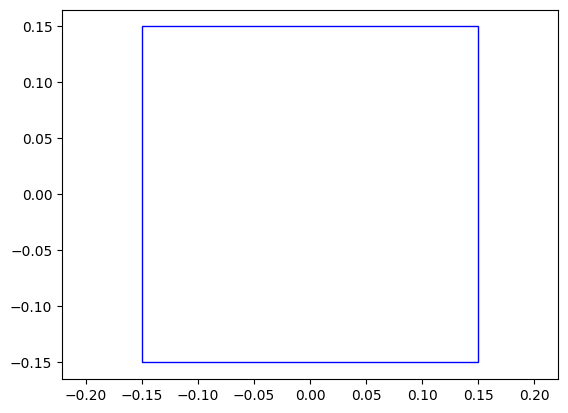

INFO:drake:Solved GCS shortest path using Mosek with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Finished 1 rounding trials.


Success!
Path:
face_0, from_0_to_1_at_0, from_0_to_1_at_1, face_1, from_1_to_2_at_1, from_1_to_2_at_2, face_2
Determinants:
1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00


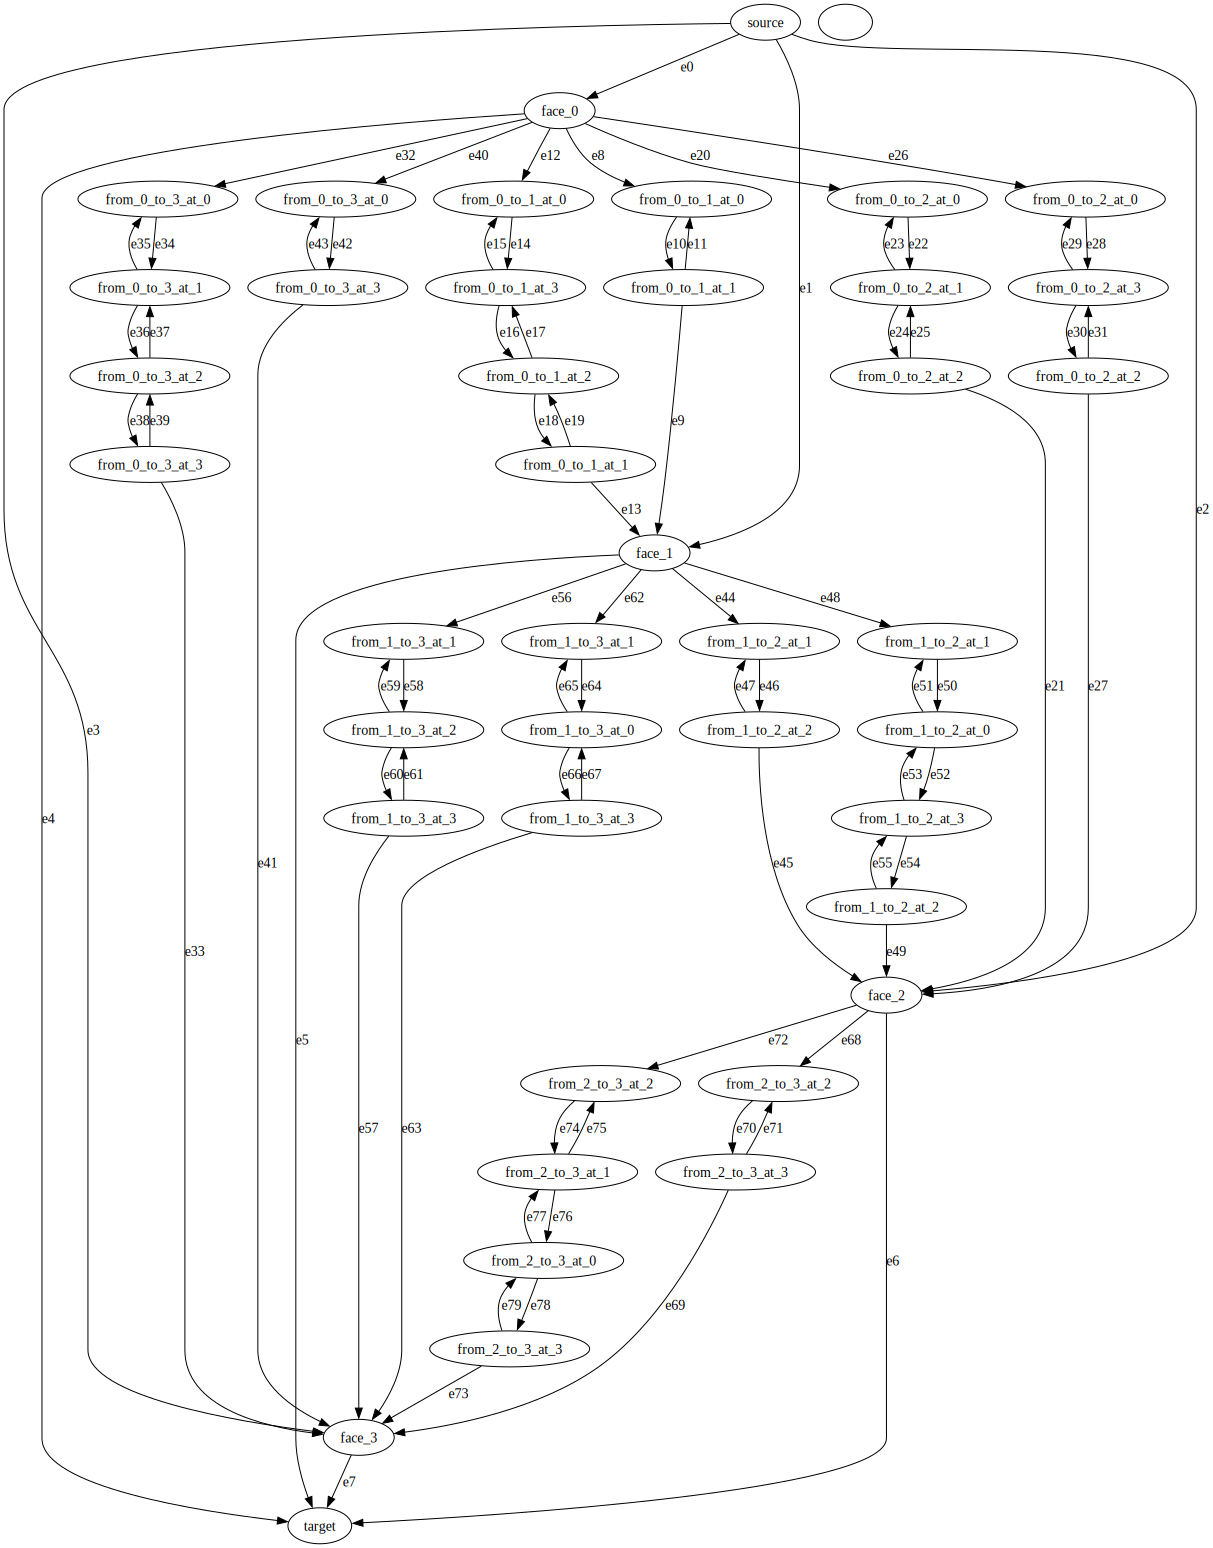

In [7]:
slider = RigidBody("box", Box2d(width=0.3, height=0.3), mass)
plot_polytope(slider.geometry.vertices)
show_gcs_diagram(plan_planar_pushing(
    start_end_specs,
    slider,
    dynamics_config,
    max_rounded_paths=1,
))

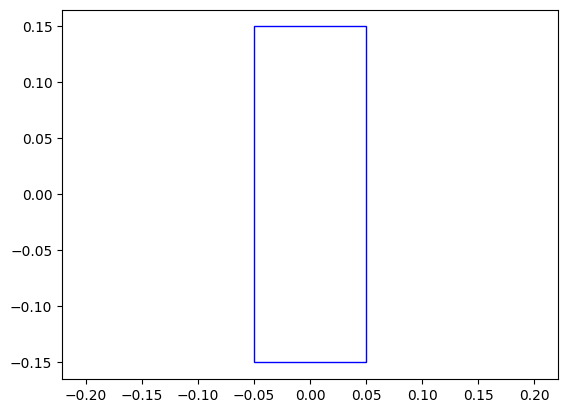

INFO:drake:Solved GCS shortest path using Mosek with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Finished 1 rounding trials.


Success!
Path:
face_0, from_0_to_1_at_0, from_0_to_1_at_1, face_1, from_1_to_3_at_1, from_1_to_3_at_0, from_1_to_3_at_3, face_3
Determinants:
1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00


In [8]:
slider = RigidBody("box", Box2d(width=0.1, height=0.3), mass)
plot_polytope(slider.geometry.vertices)
plan_planar_pushing(
    start_end_specs,
    slider,
    dynamics_config,
    max_rounded_paths=1,
)

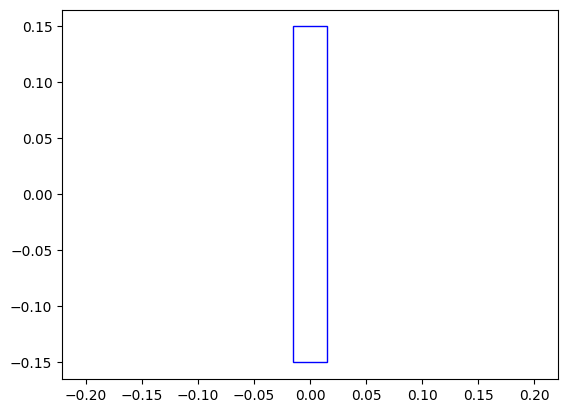

INFO:drake:Solved GCS shortest path using Mosek with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Finished 1 rounding trials.


Success!
Path:
face_0, from_0_to_1_at_0, from_0_to_1_at_1, face_1, from_1_to_3_at_1, from_1_to_3_at_0, from_1_to_3_at_3, face_3
Determinants:
1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00


In [8]:
slider = RigidBody("box", Box2d(width=0.03, height=0.3), mass)
plot_polytope(slider.geometry.vertices)
plan_planar_pushing(
    start_end_specs,
    slider,
    dynamics_config,
    max_rounded_paths=1,
)

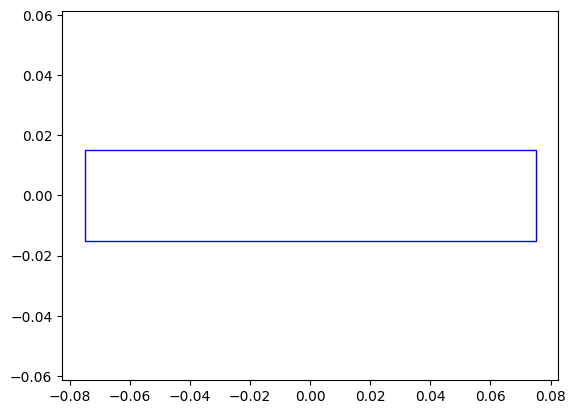

INFO:drake:Solved GCS shortest path using Mosek with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Finished 1 rounding trials.


Success!
Path:
face_0, from_0_to_1_at_0, from_0_to_1_at_1, face_1, from_1_to_2_at_1, from_1_to_2_at_2, face_2
Determinants:
1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00


In [9]:
slider = RigidBody("box", Box2d(width=0.15, height=0.03), mass)
plot_polytope(slider.geometry.vertices)
plan_planar_pushing(
    start_end_specs,
    slider,
    dynamics_config,
    max_rounded_paths=1,
)

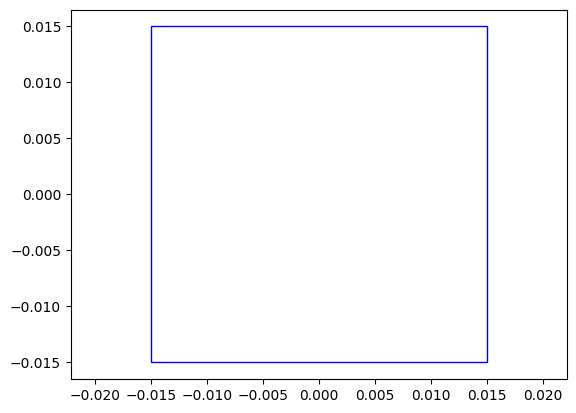

INFO:drake:Solved GCS shortest path using Mosek with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Finished 1 rounding trials.


Success!
Path:
face_0, from_0_to_1_at_0, from_0_to_1_at_1, face_1, from_1_to_2_at_1, from_1_to_2_at_2, face_2, from_2_to_3_at_2, from_2_to_3_at_3, face_3
Determinants:
1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00


In [10]:
slider = RigidBody("box", Box2d(width=0.03, height=0.03), mass)
plot_polytope(slider.geometry.vertices)
plan_planar_pushing(
    start_end_specs,
    slider,
    dynamics_config,
    max_rounded_paths=1,
)

## Tee's of varying shapes

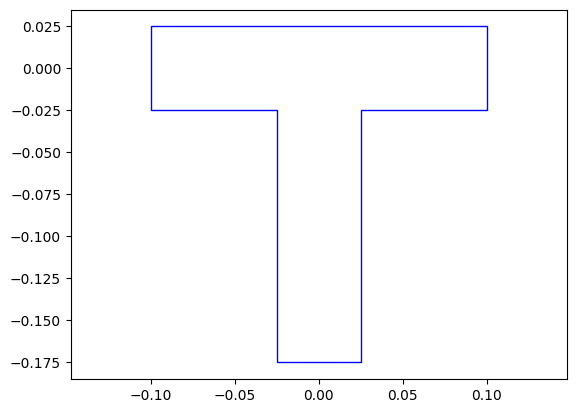

In [11]:
slider = RigidBody("t_pusher", TPusher2d(), mass)
plot_polytope(slider.geometry.vertices)
plan_planar_pushing(
    start_end_specs,
    slider,
    dynamics_config,
    max_rounded_paths=1,
)

In [ ]:
slider = RigidBody("t_pusher", TPusher2d(box_1=Box2d(width=0.1, height=0.1), box_2=Box2d(width=0.05, height=0.1)), mass)
plot_polytope(slider.geometry.vertices)
plan_planar_pushing(
    start_end_specs,
    slider,
    dynamics_config,
    max_rounded_paths=1,
)

In [ ]:

slider = RigidBody("t_pusher", TPusher2d(box_1=Box2d(width=0.1, height=0.02), box_2=Box2d(width=0.05, height=0.1)), mass)
plot_polytope(slider.geometry.vertices)
plan_planar_pushing(
    start_end_specs,
    slider,
    dynamics_config,
    max_rounded_paths=1,
)

## Lets try some with cycles

In [ ]:
slider = RigidBody("box", Box2d(width=0.3, height=0.3), mass)
plot_polytope(slider.geometry.vertices)
show_gcs_diagram(plan_planar_pushing(
    start_end_specs,
    slider,
    dynamics_config,
    max_rounded_paths=1,
    no_cycles=False,
))